<a href="https://colab.research.google.com/github/imhilla/allmlnotebooks/blob/main/imdbmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWMGTHV/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWMGTHV/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWMGTHV/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])

In [ ]:
# model 1
# parameters
embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_flatten.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 11526     
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 6s 22ms/step - loss: 0.6102 - accuracy: 0.6532 - val_loss: 0.4008 - val_accuracy: 0.8291
Epoch 2/10
196/196 [==============================] - 3s 13ms/step - loss: 0.3168 - accuracy: 0.8695 - val_loss: 0.3318 - val_accuracy: 0.8567
Epoch 3/10
196/196 [==============================] - 3s 13ms/step - loss: 0.1911 - accuracy: 0.9340 - val_loss: 0.3725 - val_accuracy: 0.8388
Epoch 4/10
196/196 [==============================] - 4s 19ms/step - loss: 0.0997 - accuracy: 0.9770 - val_loss: 0.3965 - val_accuracy: 0.8391
Epoch 5/10
196/196 [==============================] - 3s 13ms/step - loss: 0.0420 - accuracy: 0.9949 - val_loss: 0.4498 - val_accuracy: 0.8318
Epoch 6/10
196/196 [==============================] - 3s 16ms/step - loss: 0.0190 - accuracy: 0.9988 - val_loss: 0.4819 - val_accuracy: 0.8337
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0103 - accuracy: 0.9994 - val_loss: 0.5158 - val_accuracy: 0.8323

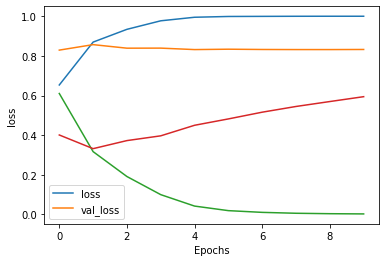

In [ ]:
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

In [ ]:
# LSTM
embedding_dim=16
lstm_dim = 32
dense_dim = 6

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 57s 242ms/step - loss: 0.5556 - accuracy: 0.6912 - val_loss: 0.4227 - val_accuracy: 0.7882
Epoch 2/10
196/196 [==============================] - 40s 203ms/step - loss: 0.3114 - accuracy: 0.8732 - val_loss: 0.3595 - val_accuracy: 0.8456
Epoch 3/10
196/196 [==============================] - 39s 198ms/step - loss: 0.2416 - accuracy: 0.9073 - val_loss: 0.3828 - val_accuracy: 0.8373
Epoch 4/10
196/196 [==============================] - 40s 206ms/step - loss: 0.1998 - accuracy: 0.9267 - val_loss: 0.4486 - val_accuracy: 0.8233
Epoch 5/10
196/196 [==============================] - 42s 212ms/step - loss: 0.1639 - accuracy: 0.9418 - val_loss: 0.4462 - val_accuracy: 0.8269
Epoch 6/10
196/196 [==============================] - 43s 217ms/step - loss: 0.1307 - accuracy: 0.9552 - val_loss: 0.4844 - val_accuracy: 0.8247
Epoch 7/10
196/196 [==============================] - 39s 202ms/step - loss: 0.1152 - accuracy: 0.9610 - val_loss: 0.5476 - val_ac

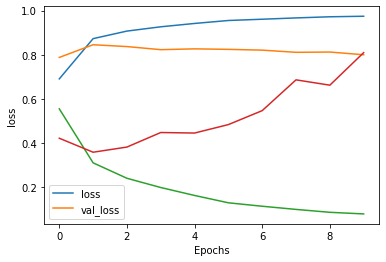

In [ ]:
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [ ]:
# GRU gated recurrent unit
import tensorflow as tf

emebedding_dim = 16
gru_dim = 32
dense_dim = 6

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 6)                 390       
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 57s 253ms/step - loss: 0.6411 - accuracy: 0.6018 - val_loss: 0.4792 - val_accuracy: 0.7807
Epoch 2/10
196/196 [==============================] - 68s 349ms/step - loss: 0.3597 - accuracy: 0.8482 - val_loss: 0.3534 - val_accuracy: 0.8484
Epoch 3/10
196/196 [==============================] - 76s 388ms/step - loss: 0.2625 - accuracy: 0.8964 - val_loss: 0.3790 - val_accuracy: 0.8406
Epoch 4/10
196/196 [==============================] - 73s 373ms/step - loss: 0.2117 - accuracy: 0.9195 - val_loss: 0.3871 - val_accuracy: 0.8403
Epoch 5/10
196/196 [==============================] - 77s 393ms/step - loss: 0.1647 - accuracy: 0.9401 - val_loss: 0.4716 - val_accuracy: 0.8315
Epoch 6/10
196/196 [==============================] - 60s 307ms/step - loss: 0.1354 - accuracy: 0.9532 - val_loss: 0.6081 - val_accuracy: 0.8136
Epoch 7/10
196/196 [==============================] - 46s 234ms/step - loss: 0.1130 - accuracy: 0.9620 - val_loss: 0.5535 - val_ac

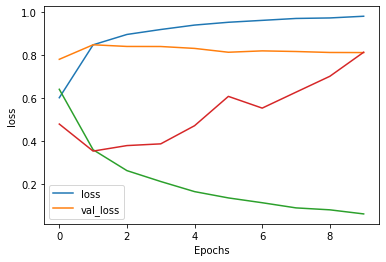

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

In [ ]:
# convolution

embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 6)                 774       
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 14s 66ms/step - loss: 0.5402 - accuracy: 0.7224 - val_loss: 0.3618 - val_accuracy: 0.8401
Epoch 2/10
196/196 [==============================] - 10s 53ms/step - loss: 0.3034 - accuracy: 0.8715 - val_loss: 0.3481 - val_accuracy: 0.8494
Epoch 3/10
196/196 [==============================] - 10s 53ms/step - loss: 0.2426 - accuracy: 0.9044 - val_loss: 0.3696 - val_accuracy: 0.8457
Epoch 4/10
196/196 [==============================] - 11s 58ms/step - loss: 0.2066 - accuracy: 0.9229 - val_loss: 0.4186 - val_accuracy: 0.8320
Epoch 5/10
196/196 [==============================] - 11s 58ms/step - loss: 0.1812 - accuracy: 0.9322 - val_loss: 0.4551 - val_accuracy: 0.8314
Epoch 6/10
196/196 [==============================] - 11s 59ms/step - loss: 0.1585 - accuracy: 0.9434 - val_loss: 0.4946 - val_accuracy: 0.8223
Epoch 7/10
196/196 [==============================] - 11s 58ms/step - loss: 0.1429 - accuracy: 0.9491 - val_loss: 0.5419 - val_accuracy:

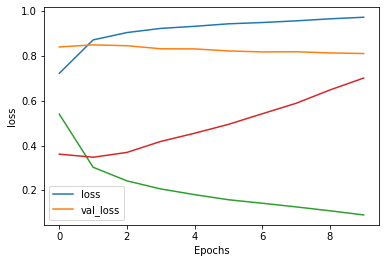

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')